In [74]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
sns.set(style="ticks", color_codes=True)

import chardet
import codecs

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import folium
from folium import plugins
from scipy import stats
import scipy.stats as stats

%matplotlib inline
plt.style.use('seaborn-white')

In [75]:
df = pd.read_csv("/Users/mille/Desktop/CMC.csv")

df.head()

,Wife_age,Wife_education,Husband_education,Number_of_childern_ever_born,Wife_religion,Wife_now_working,Husband_occupation,Standard_of_living_index,Media_exposure,Contraceptive method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1



https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.names

Attribute Information:

   1. Wife's age                     (numerical)
   2. Wife's education               (categorical)      1=low, 2, 3, 4=high
   3. Husband's education            (categorical)      1=low, 2, 3, 4=high
   4. Number of children ever born   (numerical)
   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
   6. Wife's now working?            (binary)           0=Yes, 1=No
   7. Husband's occupation           (categorical)      1, 2, 3, 4
   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
   9. Media exposure                 (binary)           0=Good, 1=Not good
   10. Contraceptive method used     (class attribute)  1=No-use 
                                                        2=Long-term
                                                        3=Short-term

In [76]:
df['Contraceptive method_used'] = df['Contraceptive method_used'].apply({ 1: 'No-use',
  2: 'Long-term',
  3: 'Short-term'}.get)

In [61]:
df.head()

,Wife_age,Wife_education,Husband_education,Number_of_childern_ever_born,Wife_religion,Wife_now_working,Husband_occupation,Standard_of_living_index,Media_exposure,Contraceptive method_used
0,24,2,3,3,1,1,2,3,0,No-use
1,45,1,3,10,1,1,3,4,0,No-use
2,43,2,3,7,1,1,3,4,0,No-use
3,42,3,2,9,1,1,3,3,0,No-use
4,36,3,3,8,1,1,3,2,0,No-use


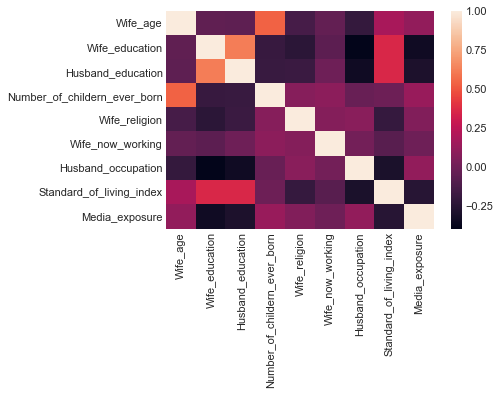

In [62]:
sns.heatmap(df.corr())

In [81]:
df = pd.read_csv("/Users/mille/Desktop/CMC.csv")

df.head()

,Wife_age,Wife_education,Husband_education,Number_of_childern_ever_born,Wife_religion,Wife_now_working,Husband_occupation,Standard_of_living_index,Media_exposure,Contraceptive method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [82]:
data = df['Wife_education'] 
target = df['Wife_age']

In [83]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(df, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [52]:
# Classify, storing the result in a new variable.
y_pred = bnb.predict(df)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1473 points : 798


C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


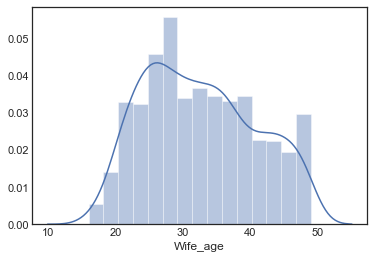

In [53]:
sns.distplot(df['Wife_age'])


Anova and t-test

C:\Users\mille\Conda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\mille\Conda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


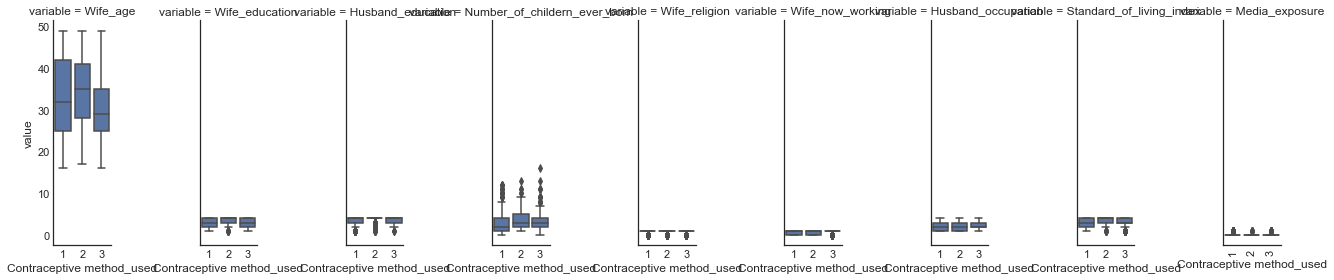

                          Husband_education                                \
                                      count      mean       std  min  25%   
Contraceptive method_used                                                   
1                                     629.0  3.281399  0.902220  1.0  3.0   
2                                     333.0  3.663664  0.707810  1.0  4.0   
3                                     511.0  3.459883  0.728856  1.0  3.0   

                                         Husband_occupation           ...   \
                           50%  75%  max              count      mean ...    
Contraceptive method_used                                             ...    
1                          4.0  4.0  4.0              629.0  2.200318 ...    
2                          4.0  4.0  4.0              333.0  1.840841 ...    
3                          4.0  4.0  4.0              511.0  2.254403 ...    

                          Wife_now_working      Wife_religion       

In [55]:
df_long = df
df_long = pd.melt(df_long, id_vars=['Contraceptive method_used'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "Contraceptive method_used", "value")
g = plt.xticks(rotation=90)

plt.show()

# Descriptive statistics by group.
print(df.groupby('Contraceptive method_used').describe())

# Test whether group differences are significant.
for col in df.loc[:,'Wife_education':'Wife_age'].columns:
    print(col)
    print(stats.ttest_ind(
        df[df['Contraceptive method_used'] == 1][col].dropna(),
        df[df['Contraceptive method_used'] == 2][col].dropna(),
        df[df['Contraceptive method_used'] == 3][col].dropna()
    ))

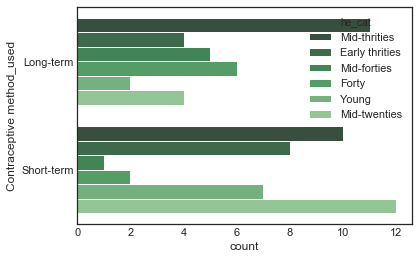

he_cat                     Early thrities  Forty  Mid-forties  Mid-thrities  \
Contraceptive method_used                                                     
Long-term                               4      6            5            11   
Short-term                              8      2            1            10   

he_cat                     Mid-twenties  Young  
Contraceptive method_used                       
Long-term                             4      2  
Short-term                           12      7  
Power_divergenceResult(statistic=24.66666666666667, pvalue=0.01019740415138673)


In [80]:
df_2cat = df.loc[
    ((df['Contraceptive method_used'] == 'Long-term') | (df['Contraceptive method_used'] == 'Short-term')) & (df['Wife_education'] == 4),
    ['Contraceptive method_used','Wife_age']
]

# Create a text variable so that output is easier to interpret.
df_2cat['he_cat'] = None
df_2cat.loc[df_2cat['Wife_age'] <= 20, 'he_cat'] = 'Young'
df_2cat.loc[df_2cat['Wife_age'] == 25, 'he_cat'] = 'Mid-twenties'
df_2cat.loc[df_2cat['Wife_age'] == 30, 'he_cat'] = 'Early thrities'
df_2cat.loc[df_2cat['Wife_age'] == 35, 'he_cat'] = 'Mid-thrities'
df_2cat.loc[df_2cat['Wife_age'] == 40, 'he_cat'] = 'Forty'
df_2cat.loc[df_2cat['Wife_age'] == 45, 'he_cat'] = 'Mid-forties'
df_2cat.loc[df_2cat['Wife_age'] == 50, 'he_cat'] = 'Fifty'
df_2cat.loc[df_2cat['Wife_age'] == 55, 'he_cat'] = 'Mid-fifties'




# Plot counts for each combination of levels.
sns.countplot(y="Contraceptive method_used", hue="he_cat", data=df_2cat, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df_2cat['Contraceptive method_used'], df_2cat['he_cat'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

Education does play an important role in contraceptives used long or short term. 

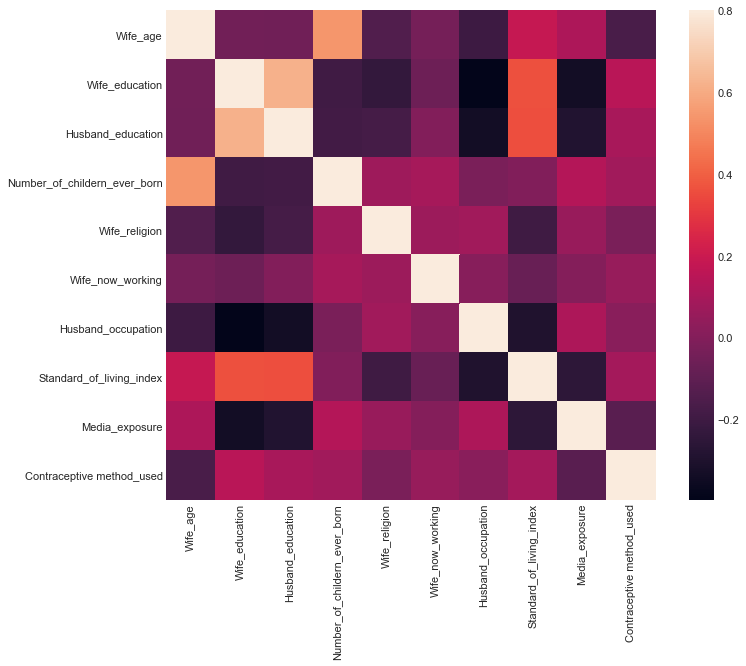

                              Wife_age  Number_of_childern_ever_born  \
Wife_age                      1.000000                      0.540126   
Number_of_childern_ever_born  0.540126                      1.000000   
Wife_education               -0.048011                     -0.193839   
wife                          0.786790                      0.709896   

                              Wife_education      wife  
Wife_age                           -0.048011  0.786790  
Number_of_childern_ever_born       -0.193839  0.709896  
Wife_education                      1.000000  0.399772  
wife                                0.399772  1.000000  


In [84]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Looks like 'pplfair','ppltrst' and 'pplhlp' are pretty redundant with each
# other. Let's make some averages. Just in case some of the variables are on
# different scales than others (one ranges from 0 to 100, one ranges from 0 to
# 7, for example) we scale them before averaging by subtracting the average of
# each variable from all values in that variable, then dividing by the
# standard deviation.
means = df[['Wife_age','Number_of_childern_ever_born','Wife_education']].mean(axis=0)
stds = df[['Wife_age','Number_of_childern_ever_born','Wife_education']].std(axis=0)
df['wife'] = ((df[['Wife_age','Number_of_childern_ever_born','Wife_education']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['Wife_age','Number_of_childern_ever_born','Wife_education']]
plotdf['wife'] = df['wife'] 
corrmat2 = plotdf.corr()

print(corrmat2)

<Figure size 432x288 with 0 Axes>

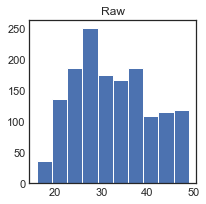

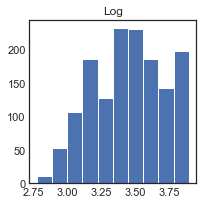

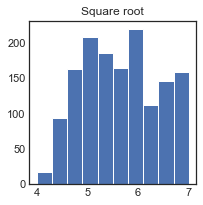

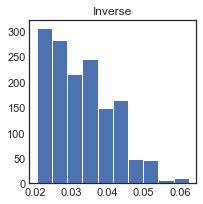

In [85]:
fig = plt.figure()

plt.subplots(figsize=(3,3))
plt.hist(df['Wife_age'].dropna())
plt.title('Raw')

plt.subplots(figsize=(3,3))
plt.hist(np.log(df['Wife_age'].dropna()))
plt.title('Log')

plt.subplots(figsize=(3,3))
plt.hist(np.sqrt(df['Wife_age'].dropna()))
plt.title('Square root')

plt.subplots(figsize=(3,3))
plt.hist(1/df['Wife_age'].dropna())
plt.title('Inverse')
plt.show()

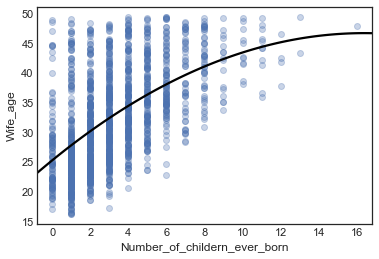

In [87]:
sns.regplot(
    df['Number_of_childern_ever_born'],
    y=df['Wife_age'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

In [88]:
df['age'] = max(df['Wife_age']) - df['Wife_age']

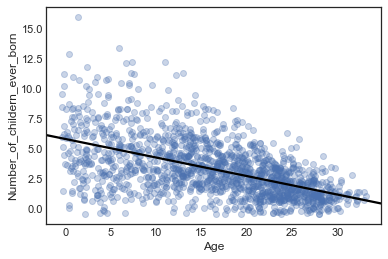

In [89]:
sns.regplot(
    df['age'],
    df['Number_of_childern_ever_born'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Age')
plt.ylabel('Number_of_childern_ever_born')
plt.show()